# Model Selection and Evaluation

#### What do we care about when choosing a final model?
- A model that meets the requirements and constraints of project stakeholders.
- A model that is sufficiently skillful given the time and resources available.
- A model that is skillful as compared to naive models.
- A model that is skillful relative to other tested models.

Link of the dataset:- https://archive.ics.uci.edu/ml/datasets/diabetes


In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Following columns or variables have an invalid zero value:

1- Glucose
2- BloodPressure
3- SkinThickness
4- Insulin
5- BMI

### It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [5]:
data_copy = data.copy()
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [6]:
data_copy.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:
data_copy['Glucose'].fillna(data_copy['Glucose'].median(), inplace = True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(), inplace = True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median(), inplace = True)
data_copy['Insulin'].fillna(data_copy['Insulin'].median(), inplace = True)
data_copy['BMI'].fillna(data_copy['BMI'].median(), inplace = True)

In [8]:
data_copy.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data_copy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


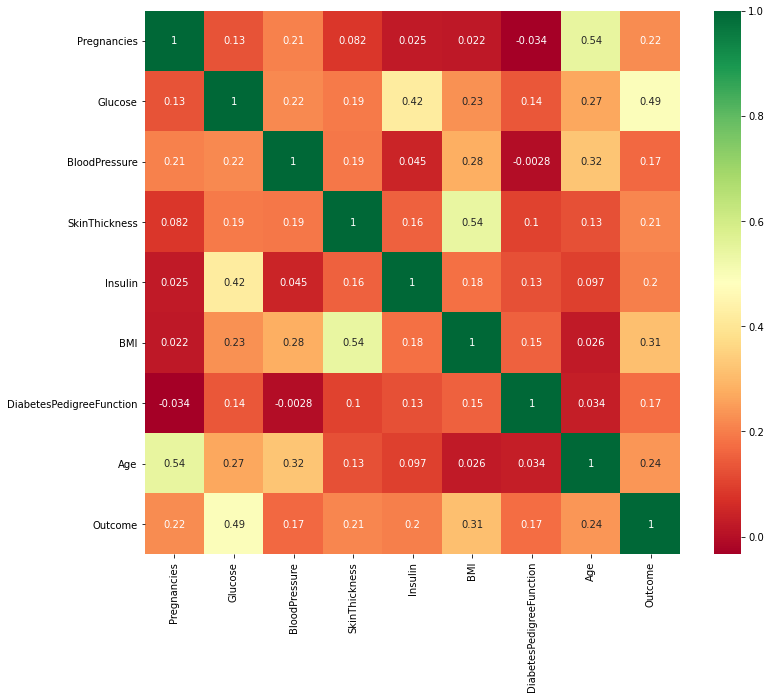

In [10]:
plt.figure(figsize=(12,10))
p=sns.heatmap(data_copy.corr(), annot=True,cmap ='RdYlGn')  

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X =  pd.DataFrame(sc.fit_transform(data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [12]:
y = data_copy.Outcome

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42)

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
clf = RandomForestClassifier()

In [16]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [17]:
clf_=clf.predict(X_test)
confusion_matrix(y_test,clf_)

array([[136,  34],
       [ 29,  57]], dtype=int64)

In [18]:
from sklearn.metrics import 
confusion_matrix,
f1_score,
precision_score,
plot_roc_curve,
accuracy_score,
roc_curve,
roc_auc_score,
recall_score

In [19]:
print("random forest F1-score",f1_score(y_test,clf_))
print("random forest Recall: ",recall_score(y_test,clf_))
print("random forest Recall: ",precision_score(y_test,clf_))


random forest F1-score 0.6440677966101694
random forest Recall:  0.6627906976744186
random forest Recall:  0.6263736263736264


In [20]:
clf2=LogisticRegression()
clf2.fit(X_train,y_train)
clf2_=clf2.predict(X_test)
confusion_matrix(y_test,clf2_)

array([[140,  30],
       [ 36,  50]], dtype=int64)

In [21]:
print("F1-score",f1_score(y_test,clf2_))
print("Recall: ",recall_score(y_test,clf2_))
print("percision: ",recall_score(y_test,clf2_))

F1-score 0.6024096385542168
Recall:  0.5813953488372093
percision:  0.5813953488372093


## K-Fold Cross validation--> Ensures that every observation from the original dataset has the chance of appearing in training and test set.

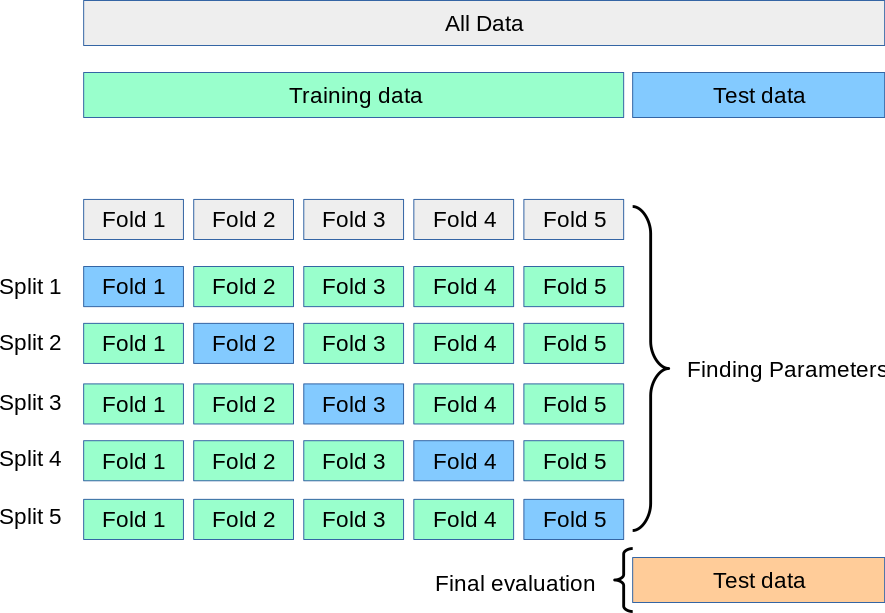

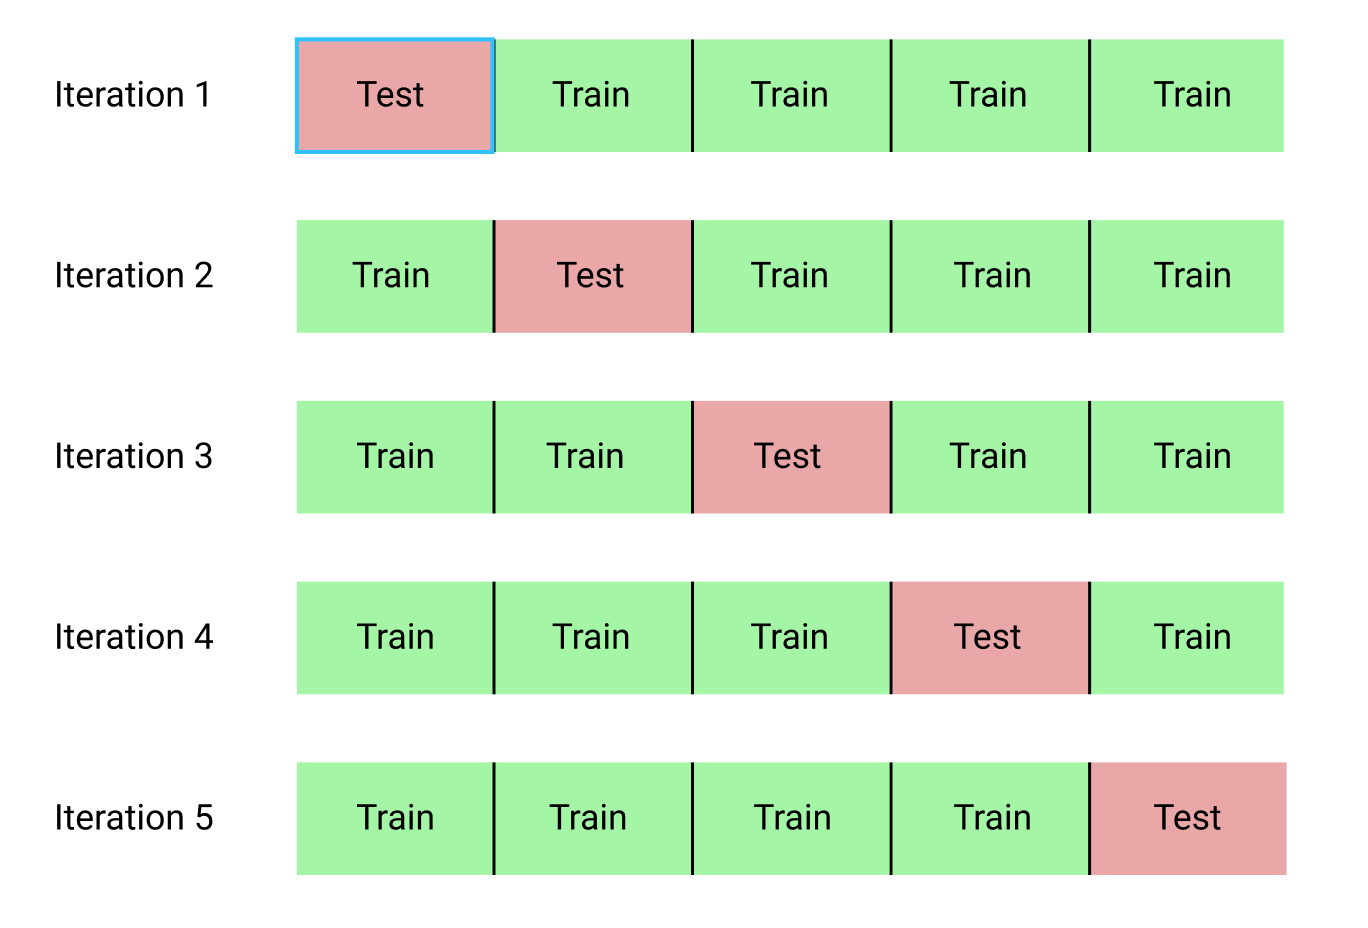

## GridSearch:

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid={
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [23]:
param_grid

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [24]:
clf = RandomForestClassifier()
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv = 3, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.785128 using {'max_depth': 90, 'n_estimators': 200}


In [25]:
model=grid_result.best_estimator_

In [26]:
model

RandomForestClassifier(max_depth=90, n_estimators=200)

In [27]:
model_pre=model.predict(X_test)


In [28]:
accuracy_score(y_test,model_pre)

0.76171875

In [29]:
confusion_matrix(y_test,model_pre)

array([[137,  33],
       [ 28,  58]], dtype=int64)

## Model Evaluation Metrics

- Confusion matrix
- Area under curve (AUC)
- F-Measure

In [30]:
conf_mat=confusion_matrix(y_test,model_pre)
conf_mat

array([[137,  33],
       [ 28,  58]], dtype=int64)

In [31]:
from mlxtend.plotting import plot_confusion_matrix

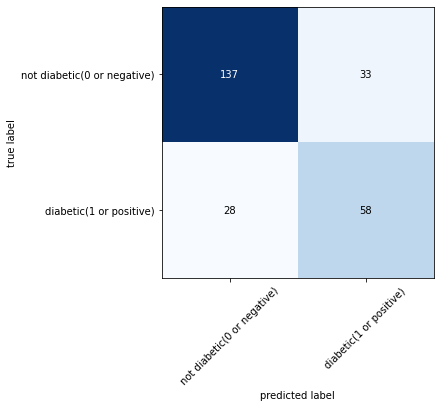

In [32]:
plot_confusion_matrix(conf_mat,class_names=["not diabetic(0 or negative)","diabetic(1 or positive)"],figsize=(12,5)); #fn

# AUC :
- Area under The Curve is a performance metric for measuring the ability of a binary classifier to discriminate between positive and negative classes.


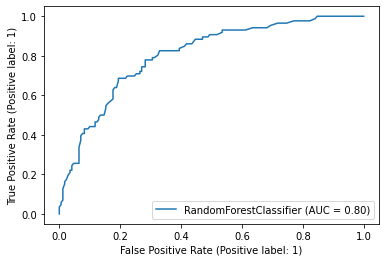

In [33]:
plot_roc_curve(model, X_test, y_test)

In [34]:
from sklearn.svm import SVC
C_grid = 0.02*np.arange(1,20)
gamma_grid = 0.02*np.arange(1,50)
print(C_grid,gamma_grid)
parameters = {'C': C_grid, 'gamma' : gamma_grid}
gridCV = GridSearchCV(SVC(kernel='rbf'), parameters, n_jobs=-1)             
gridCV.fit(X_train, y_train)
best_C = gridCV.best_params_['C']
best_gamma = gridCV.best_params_['gamma']

[0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38] [0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28
 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56
 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84
 0.86 0.88 0.9  0.92 0.94 0.96 0.98]


In [38]:
best_C,best_gamma

(0.28, 0.06)

In [35]:
SVM_best = SVC(kernel='rbf', C=best_C,gamma=best_gamma)
SVM_best.fit(X_train, y_train);
Y_pred = SVM_best.predict(X_test)
print( "SVM best accuracy : " + str(np.round(accuracy_score(y_test,Y_pred),3)))

SVM best accuracy : 0.742


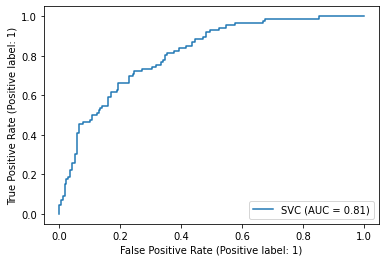

In [36]:
plot_roc_curve(SVM_best, X_test, y_test)